# Game Risk
***

This notebook simulates 1000 individual battle rounds in the board game **Risk**, specifically the scenario where 3 attackers face 2 defenders. Each battle round represents a single roll of the dice for both sides, and the results of these rounds are analyzed and plotted. 

The aim is to observe the outcomes of these battle rounds and visualize the results in a meaningful way, shedding light on the probabilities of different outcomes in this specific scenario.

## Rules of Risk

The following rules govern each battle round:
- The attacker rolls up to **3 dice**, representing 3 troops.
- The defender rolls up to **2 dice**, representing 2 troops.
- The dice are sorted in descending order, and the results are compared as follows:
  1. The highest attack die is compared to the highest defense die. If the attacker's die is greater, the defender loses one troop. Otherwise, the attacker loses one troop.
  2. The second-highest attack die is compared to the second-highest defense die (if applicable), following the same rule.
- Troop losses are recorded based on these comparisons, with the possible outcomes being:
  - **Attacker looses 2:** The attacker looses both comparisons.
  - **Defender looses 2:** The defender looses both comparisons.
  - **Each looses 1:** Both sides looses one comparison.

## Importing Libraries

We use `numpy` for simulating dice rolls and `matplotlib` for plotting the results [[34]](#34) [[7]](#7).

In [1]:
# Import numpy and matplotlib

import numpy as np


import matplotlib.pyplot as plt

## Defining a Single Battle Round

This function simulates a single battle round between 3 attackers and 2 defenders. It rolls and sorts the dice for both sides and determines the troop losses for each side.

The `battle()` function simulates a single combat round in the Risk game. The attacker rolls three dice and the defender rolls two (random intergers), with both sets sorted in descending order [[35]](#35) [[36]](#36). The highest dice from each side are compared, followed by the second-highest, to determine troop losses for each side. 

In [3]:
def battle():
    # Attacker rolls 3 dice
    attackerdice = np.sort(np.random.randint(1, 7, 3))[::-1]
    # Defender rolls 2 dice
    defenderdice = np.sort(np.random.randint(1, 7, 2))[::-1]

    # Initialize losses
    attacker_loose = 0
    defender_loose = 0

    # Compare top dice
    if attackerdice[0] > defenderdice[0]:
        defender_loose += 1
    else:
        attacker_loose += 1

    # Compare second-highest dice
    if attackerdice[1] > defenderdice[1]:
        defender_loose += 1
    else:
        attacker_loose += 1

    return attacker_loose, defender_loose

## Simulating 1000 Battle Rounds

This function runs the simulation for a specified number of battle rounds (default: 1000) and records the results.

The `total_battles` function simulates 1000 battle rounds. It initializes a results dictionary to track the outcome of each round: whether the attacker loses 2, the defender loses 2, or each loses 1. 

For each battle, it calls the `battle()` function, which returns the number of troops lost by both the attacker and the defender. Based on the result of each round, the function updates the corresponding count in the `results` dictionary. After simulating all rounds, it returns the final results.

In [23]:
def total_battles(rounds=1000):
    # Initialize results dictionary
    results = {"Attacker looses 2": 0, "Each looses 1": 0, "Defender looses 2": 0}

    for i in range(rounds):
        # Perform a single battle
        attacker_loose, defender_loose = battle()

        # Update results based on outcome
        if attacker_loose == 2:
            results["Attacker looses 2"] += 1
        elif defender_loose == 2:
            results["Defender looses 2"] += 1
        else:
            results["Each looses 1"] += 1

    return results

## Running the Simulation

We simulate 1000 battle rounds and store the outcomes.

In [25]:
results = total_battles()

## Visualizing the Results

This section plots the results as a bar chart. Each bar represents the frequency of a specific outcome, making it easy to interpret the probabilities of different results.

The `plt.figure()` function sets the size of the plot, while `plt.bar()` generates the bars using the keys and values from the `results` dictionary, which represent the battle outcomes and their respective frequencies [[37]](#37) [[38]](#38). Each bar is colored differently for clarity, and the heights of the bars correspond to the frequency of each outcome (attacker loses 2, defender loses 2, or each loses 1) [[38]](#38). 

The loop iterates through each bar to add the corresponding frequency value as a label on top of each bar using `plt.text()` [[39]](#39). The `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` functions add descriptive labels to the chart, providing context about the data being displayed [[39]](#39). Finally, `plt.show()` renders the plot, displaying it with all the customizations.

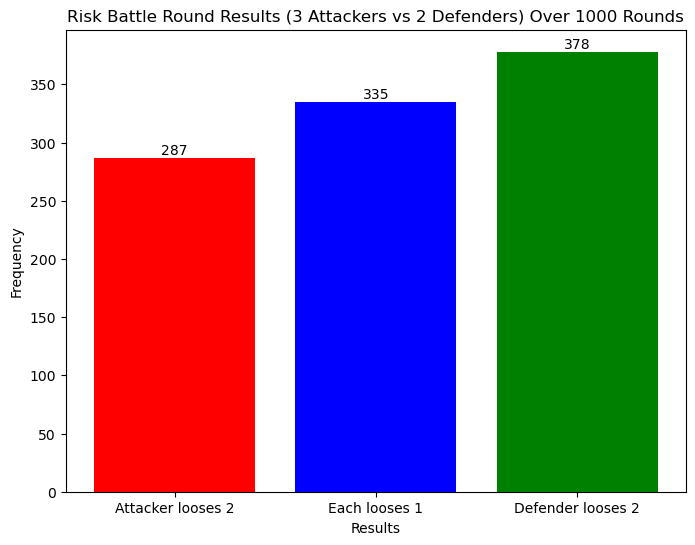

In [26]:
# Plotting the results
plt.figure(figsize=(8, 6))
bars = plt.bar(results.keys(), results.values(), color=['red', 'blue', 'green'])
# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')  # va='bottom' positions the text above the bar
plt.title("Risk Battle Round Results (3 Attackers vs 2 Defenders) Over 1000 Rounds")
plt.xlabel("Results")
plt.ylabel("Frequency")
plt.show()

## Simulating Full Battles in Risk


### Defining a Full Battle Simulation
This function simulates an entire battle between two armies until one side loses all troops. It applies the Risk battle rules iteratively, reducing troop counts after each round.

In [14]:
def full_battle(attacker_size, defender_size):
    # Initialize army sizes
    attacker_troops = attacker_size
    defender_troops = defender_size

    # Simulate rounds until one side is wiped out
    while attacker_troops > 0 and defender_troops > 0:
        # Attacker uses up to 3 dice, defender uses up to 2 dice
        attackerdice = np.sort(np.random.randint(1, 7, min(3, attacker_troops)))[::-1]
        defenderdice = np.sort(np.random.randint(1, 7, min(2, defender_troops)))[::-1]

        # Compare dice to determine troop losses
        for i in range(min(len(attackerdice), len(defenderdice))):
            if attackerdice[i] > defenderdice[i]:
                defender_troops -= 1
            else:
                attacker_troops -= 1

    # Return the outcome
    return "Attacker Wins" if defender_troops == 0 else "Defender Wins"

### Simulating Multiple Full Battles
This function runs multiple full battles between armies of arbitrary sizes and records the final outcomes.

In [15]:
def simulate_battles(num_battles, attacker_size, defender_size):
    results = {"Attacker Wins": 0, "Defender Wins": 0}

    for _ in range(num_battles):
        result = full_battle(attacker_size, defender_size)
        results[result] += 1

    return results

### Running the Simulation

We simulate 1000 full battles between armies of 15 attackers and 10 defenders. The numbers can be adjusted to explore other scenarios.

In [27]:
# Parameters for the simulation
num_battles = 1000
attacker_size = 15
defender_size = 15

# Run the simulation
results = simulate_battles(num_battles, attacker_size, defender_size)

### Visualizing the Results

The following code generates a bar chart to visualize the outcomes of the full battle simulations.

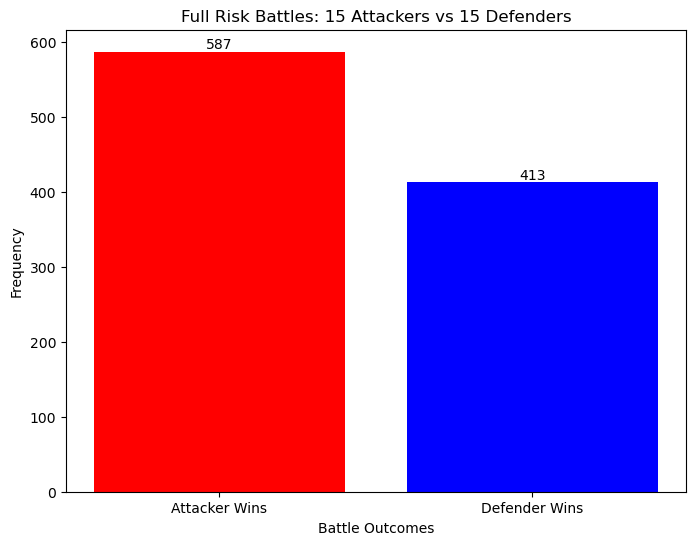

In [28]:
# Plotting the results
plt.figure(figsize=(8, 6))
bars = plt.bar(results.keys(), results.values(), color=['red', 'blue'])

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

# Adding chart titles and labels
plt.title(f"Full Risk Battles: {attacker_size} Attackers vs {defender_size} Defenders")
plt.xlabel("Battle Outcomes")
plt.ylabel("Frequency")
plt.show()

### Additional Visualization: Number of Troops Remaining

To gain further insights, we can modify the simulation to track the number of troops remaining for the winner.

In [29]:
def full_battle_with_troops(attacker_size, defender_size):
    attacker_troops = attacker_size
    defender_troops = defender_size

    while attacker_troops > 0 and defender_troops > 0:
        attackerdice = np.sort(np.random.randint(1, 7, min(3, attacker_troops)))[::-1]
        defenderdice = np.sort(np.random.randint(1, 7, min(2, defender_troops)))[::-1]

        for i in range(min(len(attackerdice), len(defenderdice))):
            if attackerdice[i] > defenderdice[i]:
                defender_troops -= 1
            else:
                attacker_troops -= 1

    # Return winner and troops remaining
    if defender_troops == 0:
        return "Attacker Wins", attacker_troops
    else:
        return "Defender Wins", defender_troops

# Extended simulation to track remaining troops
def simulate_battles_with_troops(num_battles, attacker_size, defender_size):
    results = {"Attacker Wins": [], "Defender Wins": []}

    for _ in range(num_battles):
        winner, remaining_troops = full_battle_with_troops(attacker_size, defender_size)
        results[winner].append(remaining_troops)

    return results

# Run the extended simulation
detailed_results = simulate_battles_with_troops(num_battles, attacker_size, defender_size)

### Visualizing Remaining Troops

Here, we plot the distribution of remaining troops for each side when they win.

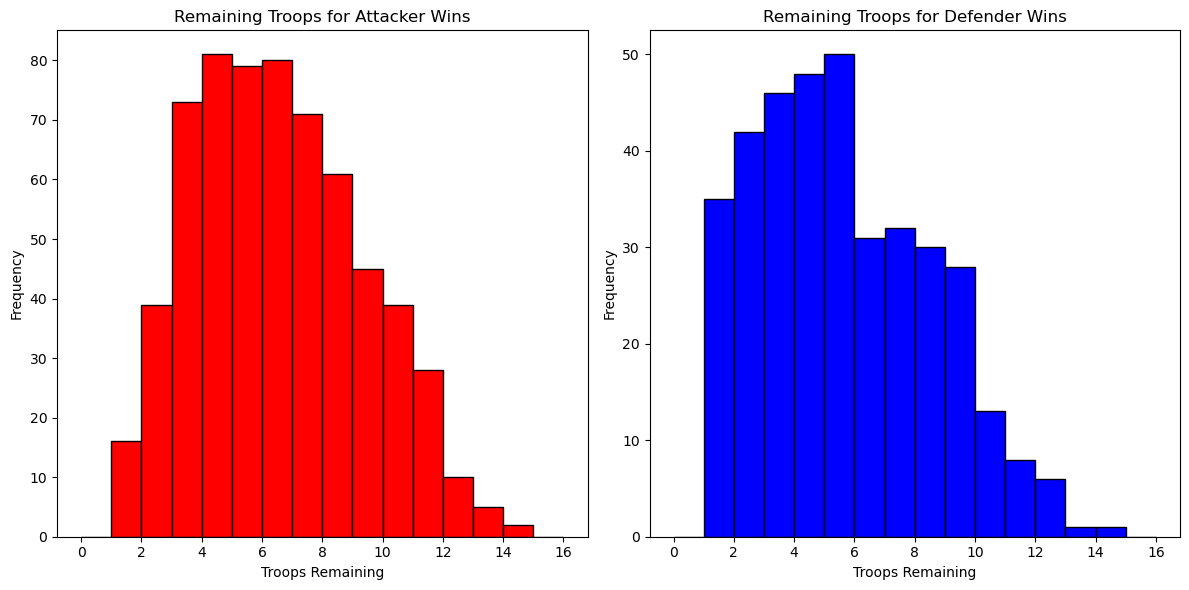

In [30]:
# Plot remaining troops distributions
plt.figure(figsize=(12, 6))

# Plot attacker wins
plt.subplot(1, 2, 1)
plt.hist(detailed_results["Attacker Wins"], bins=range(0, attacker_size + 2), color='red', edgecolor='black')
plt.title("Remaining Troops for Attacker Wins")
plt.xlabel("Troops Remaining")
plt.ylabel("Frequency")

# Plot defender wins
plt.subplot(1, 2, 2)
plt.hist(detailed_results["Defender Wins"], bins=range(0, defender_size + 2), color='blue', edgecolor='black')
plt.title("Remaining Troops for Defender Wins")
plt.xlabel("Troops Remaining")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Conclusion

This extended simulation models entire battles instead of single rounds, providing deeper insights into how troop sizes influence the outcomes. The additional visualization of remaining troops offers a granular view of how decisive each victory tends to be. By adjusting the starting troop sizes and running multiple simulations, you can explore various strategic scenarios in the game Risk.

***
# End